In [2]:
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np

# Para mostrar todas las columnas cuando se imprime un df
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')


## 1. Introducción a los Procesos de Poisson Inhomogéneos

Los procesos de Poisson son un modelo fundamental en la teoría de procesos estocásticos, utilizados para describir fenómenos que ocurren de forma aleatoria en el tiempo o en el espacio.

### Historia y Definición Básica

**Procesos de Poisson Homogéneos:** 
Un proceso de Poisson homogéneo se caracteriza por tener una tasa de ocurrencia constante. Matemáticamente, se define como un proceso de conteo \( N(t) \) donde \( N(t) \) representa el número de eventos que han ocurrido hasta el tiempo \( t \).

La probabilidad de que ocurran \( k \) eventos en un intervalo de tiempo de longitud \( t \) se describe mediante la distribución de Poisson:

$$ P(N(t) = k) = \frac{e^{-\lambda t} (\lambda t)^k}{k!} $$

donde \( \lambda \) es la tasa constante de ocurrencia de eventos.

### Procesos de Poisson Inhomogéneos

**Definición:**
A diferencia del caso homogéneo, en un proceso de Poisson inhomogéneo, la tasa de ocurrencia de eventos, \( \lambda(t) \), puede variar con el tiempo. Esto permite modelar situaciones más complejas y realistas donde la intensidad del proceso no es constante.

**Propiedad Fundamental:**
Para un intervalo pequeño \( \delta t \), la probabilidad de que ocurra exactamente un evento en \( [t, t + \delta t) \) es aproximadamente \( \lambda(t) \delta t \).

---

## 2. Conceptos Clave

### Intensidad y Función de Tasa

**Función de Tasa \( \lambda(t) \):**
En un proceso de Poisson inhomogéneo, la función de tasa \( \lambda(t) \) describe la tasa instantánea de ocurrencia de eventos en el tiempo \( t \). No es una probabilidad, sino una tasa que puede cambiar con el tiempo.

### Propiedades Estadísticas

Los procesos de Poisson inhomogéneos tienen propiedades únicas que los diferencian de otros procesos estocásticos:

1. **Incrementos Independientes:** Los números de eventos que ocurren en intervalos de tiempo disjuntos son independientes entre sí.
2. **Incrementos Estacionarios:** En el caso homogéneo, los incrementos son estacionarios, lo que significa que la distribución de los eventos depende solo de la longitud del intervalo de tiempo, no de su ubicación específica en el tiempo. En el caso inhomogéneo, esta propiedad se ajusta para tener en cuenta la variabilidad de la tasa.

### Diferencias con Procesos Homogéneos

A diferencia de los procesos homogéneos, en los procesos inhomogéneos:

- La tasa de ocurrencia \( \lambda(t) \) varía con el tiempo.
- La distribución de los eventos está influenciada por esta tasa variable.



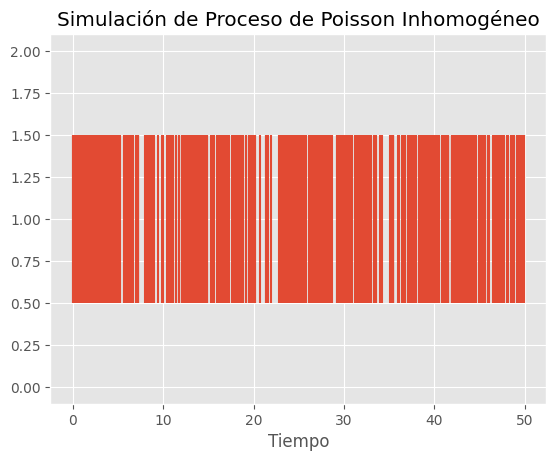

In [3]:


def simulate_inhomogeneous_poisson_process(lam_t, T, lam_star):
    """
    Simula un proceso de Poisson inhomogéneo.
    :param lam_t: Función lambda(t) que define la tasa en el tiempo t.
    :param T: Tiempo total de simulación.
    :param lam_star: Tasa máxima para el proceso de Poisson homogéneo.
    :return: Tiempos de los eventos.
    """
    events = []
    t = 0
    while t < T:
        t += np.random.exponential(1/lam_star)
        if np.random.uniform(0, 1) < lam_t(t)/lam_star:
            events.append(t)
    return events

# Ejemplo de una función de tasa variable
def lam_t(t):
    return 10 + 5*np.sin(t/2)

# Parámetros
T = 50  # Tiempo total de simulación
lam_star = 15  # Estimar una tasa máxima

# Simulación
events = simulate_inhomogeneous_poisson_process(lam_t, T, lam_star)

# Visualización
plt.eventplot(events, orientation='horizontal')
plt.title('Simulación de Proceso de Poisson Inhomogéneo')
plt.xlabel('Tiempo')
plt.show()


# Ejemplo

Tráfico de sitio Web

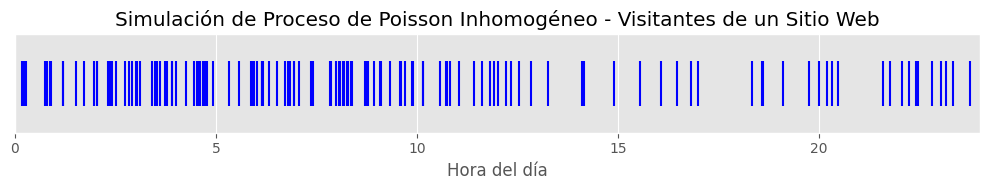

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_inhomogeneous_poisson_process(lam_t, T, lam_star):
    """
    Simula un proceso de Poisson inhomogéneo.
    :param lam_t: Función lambda(t) que define la tasa en el tiempo t.
    :param T: Tiempo total de simulación.
    :param lam_star: Tasa máxima para el proceso de Poisson homogéneo.
    :return: Tiempos de los eventos.
    """
    events = []
    t = 0
    while t < T:
        t += np.random.exponential(1/lam_star)
        if np.random.uniform(0, 1) < lam_t(t)/lam_star:
            events.append(t)
    return events

# Ejemplo de una función de tasa variable para simular la llegada de visitantes a un sitio web
def lam_t(t):
    # La tasa aumenta durante las horas pico (8-10 am y 6-8 pm)
    return 5 + 3 * np.sin(np.pi * t / 12)

# Parámetros para el ejercicio
T = 24  # Simulación para un día entero (24 horas)
lam_star = 8  # Estimar una tasa máxima

# Simulación del proceso de Poisson inhomogéneo
events = simulate_inhomogeneous_poisson_process(lam_t, T, lam_star)

# Visualización del proceso simulado
plt.figure(figsize=(10, 2))
plt.eventplot(events, orientation='horizontal', color='blue')
plt.title('Simulación de Proceso de Poisson Inhomogéneo - Visitantes de un Sitio Web')
plt.xlabel('Hora del día')
plt.xlim(0, T)
plt.yticks([])
plt.tight_layout()
plt.show()



Simulación de la llegada de visitantes a un sitio web a lo largo de un día. La función de tasa $\lambda(t)$ se ha diseñado para reflejar un aumento durante las horas pico.

En la visualización, cada línea representa un evento (una visita al sitio web) en un momento específico del día. Como se puede ver, los eventos están más concentrados en ciertos períodos, reflejando las horas pico en la tasa de llegada.

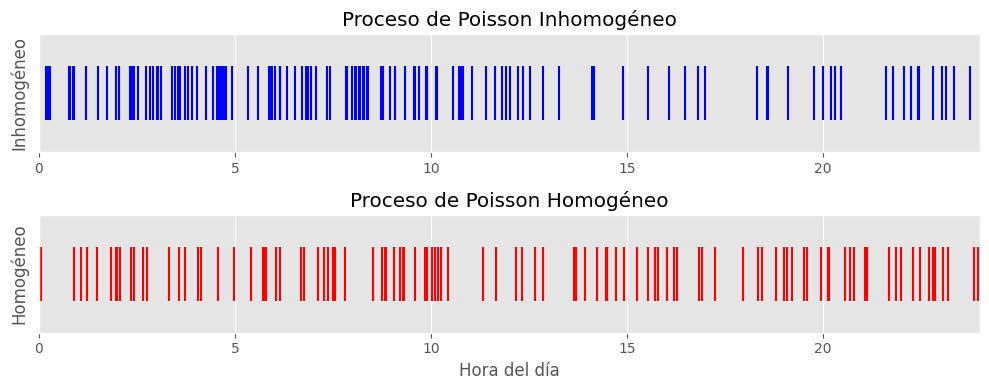

In [6]:
def simulate_homogeneous_poisson_process(lam, T):
    """
    Simula un proceso de Poisson homogéneo.
    :param lam: Tasa constante de ocurrencia de eventos.
    :param T: Tiempo total de simulación.
    :return: Tiempos de los eventos.
    """
    events = []
    t = 0
    while t < T:
        t += np.random.exponential(1/lam)
        events.append(t)
    return events

# Parámetros para el proceso homogéneo
lam_homogeneous = 5  # Tasa constante

# Simulación del proceso homogéneo
events_homogeneous = simulate_homogeneous_poisson_process(lam_homogeneous, T)

# Visualización de ambos procesos para comparación
plt.figure(figsize=(10, 4))

# Proceso inhomogéneo
plt.subplot(2, 1, 1)
plt.eventplot(events, orientation='horizontal', color='blue')
plt.title('Proceso de Poisson Inhomogéneo')
plt.xlim(0, T)
plt.ylabel('Inhomogéneo')
plt.yticks([])

# Proceso homogéneo
plt.subplot(2, 1, 2)
plt.eventplot(events_homogeneous, orientation='horizontal', color='red')
plt.title('Proceso de Poisson Homogéneo')
plt.xlabel('Hora del día')
plt.xlim(0, T)
plt.ylabel('Homogéneo')
plt.yticks([])

plt.tight_layout()
plt.show()

